# Supernova distances and redshift
These are some (synthetic but realistic; see textbook) supernova data.
- First, explore fitting this data with the tecniques we have seen.
- Start from linear regression and polynomial regression
- For the case of polynomial regression, just fit many of them for now.
- Let's bet based on intuition! Which fit is the best?
- In what cases are you underfitting the data?
- In what cases are you overfitting the data?
- Now split the data into training and validation sets
- Implement a cross-validation procedure
- Pick the best!
- Does it agree with our bets?
- Repeat with Basis Function Regression and Kernel Regression
- Explore what happens when you change the number of datapoints and plot the resulting learning curves.

In [2]:
from astroML.datasets import generate_mu_z
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from astroML.linear_model import PolynomialRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error 
from astroML.linear_model import BasisFunctionRegression
from astroML.linear_model import NadarayaWatson
from astroML.plotting import setup_text_plots
from sklearn.model_selection import KFold, cross_validate

C:\Users\ISAFA\anaconda3\Lib\site-packages\astroML\linear_model\linear_regression_errors.py:10: UserWarning: LinearRegressionwithErrors requires PyMC3 to be installed
  warnings.warn('LinearRegressionwithErrors requires PyMC3 to be installed')


## Visualization of the data

Text(0.5, 1.0, 'Supernovae dataset')

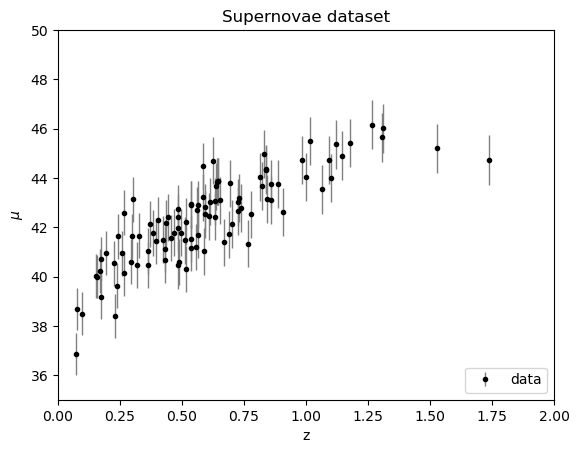

In [3]:
z_sample, mu_sample, dmu = generate_mu_z(100, random_state=1234)

plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1,label='data')
plt.xlabel("z")
plt.ylabel("$\mu$")
plt.legend(loc='lower right')
plt.xlim(0,2)
plt.ylim(35,50)
plt.title('Supernovae dataset')

## Linear Regression

[39.56505555] [[4.64711848]]


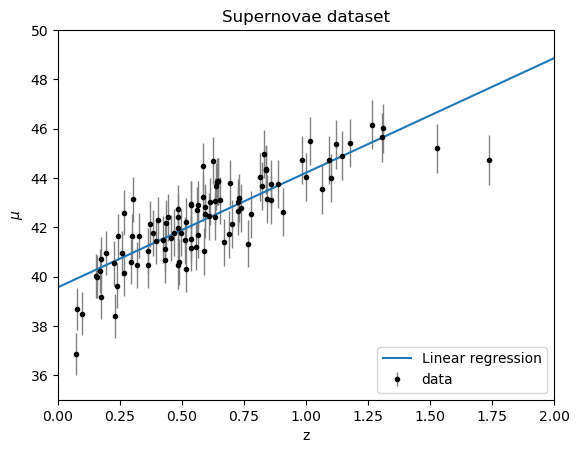

In [4]:
X_new = np.array([[0], [2]])
z_sample_r = z_sample.reshape(-1,1)
mu_sample_r = mu_sample.reshape(-1,1)
lin_reg = LinearRegression()
lin_reg.fit(z_sample_r, mu_sample_r)

theta0 = lin_reg.intercept_
theta1 = lin_reg.coef_

print(theta0, theta1)
y_pred = lin_reg.predict(X_new)

plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1,label='data')
plt.xlabel("z")
plt.ylabel("$\mu$")
plt.xlim(0,2)
plt.ylim(35,50)
plt.title('Supernovae dataset')
plt.plot(X_new, y_pred, label ='Linear regression')
plt.legend(loc='lower right')

## Polynomial regression

With 1 degree the model coefficients are: [39.48384602  4.76438865]
With 2 degree the model coefficients are: [38.41076899  8.59831905 -2.64090751]
With 3 degree the model coefficients are: [38.36452837  8.87820312 -3.06677777  0.17557977]
With 4 degree the model coefficients are: [ 36.95622821  21.50098389 -34.55444621  28.77101798  -8.39275909]
With 5 degree the model coefficients are: [ 36.09081526  32.02899002 -73.25156852  87.69138092 -47.26697125
   9.15349892]
With 6 degree the model coefficients are: [  35.38164335   43.1313125  -128.73943257  210.2480827  -179.32235517
   76.99221964  -13.2572731 ]
With 7 degree the model coefficients are: [   33.07559304    87.7120308   -415.17424944  1058.97570095
 -1489.07605607  1161.10280616  -468.28719026    75.87210529]
With 8 degree the model coefficients are: [  33.56005026   76.71142746 -328.69429349  732.80233277 -817.31111321
  366.63790661   68.65384201 -116.42734489   28.24788153]


(30.0, 50.0)

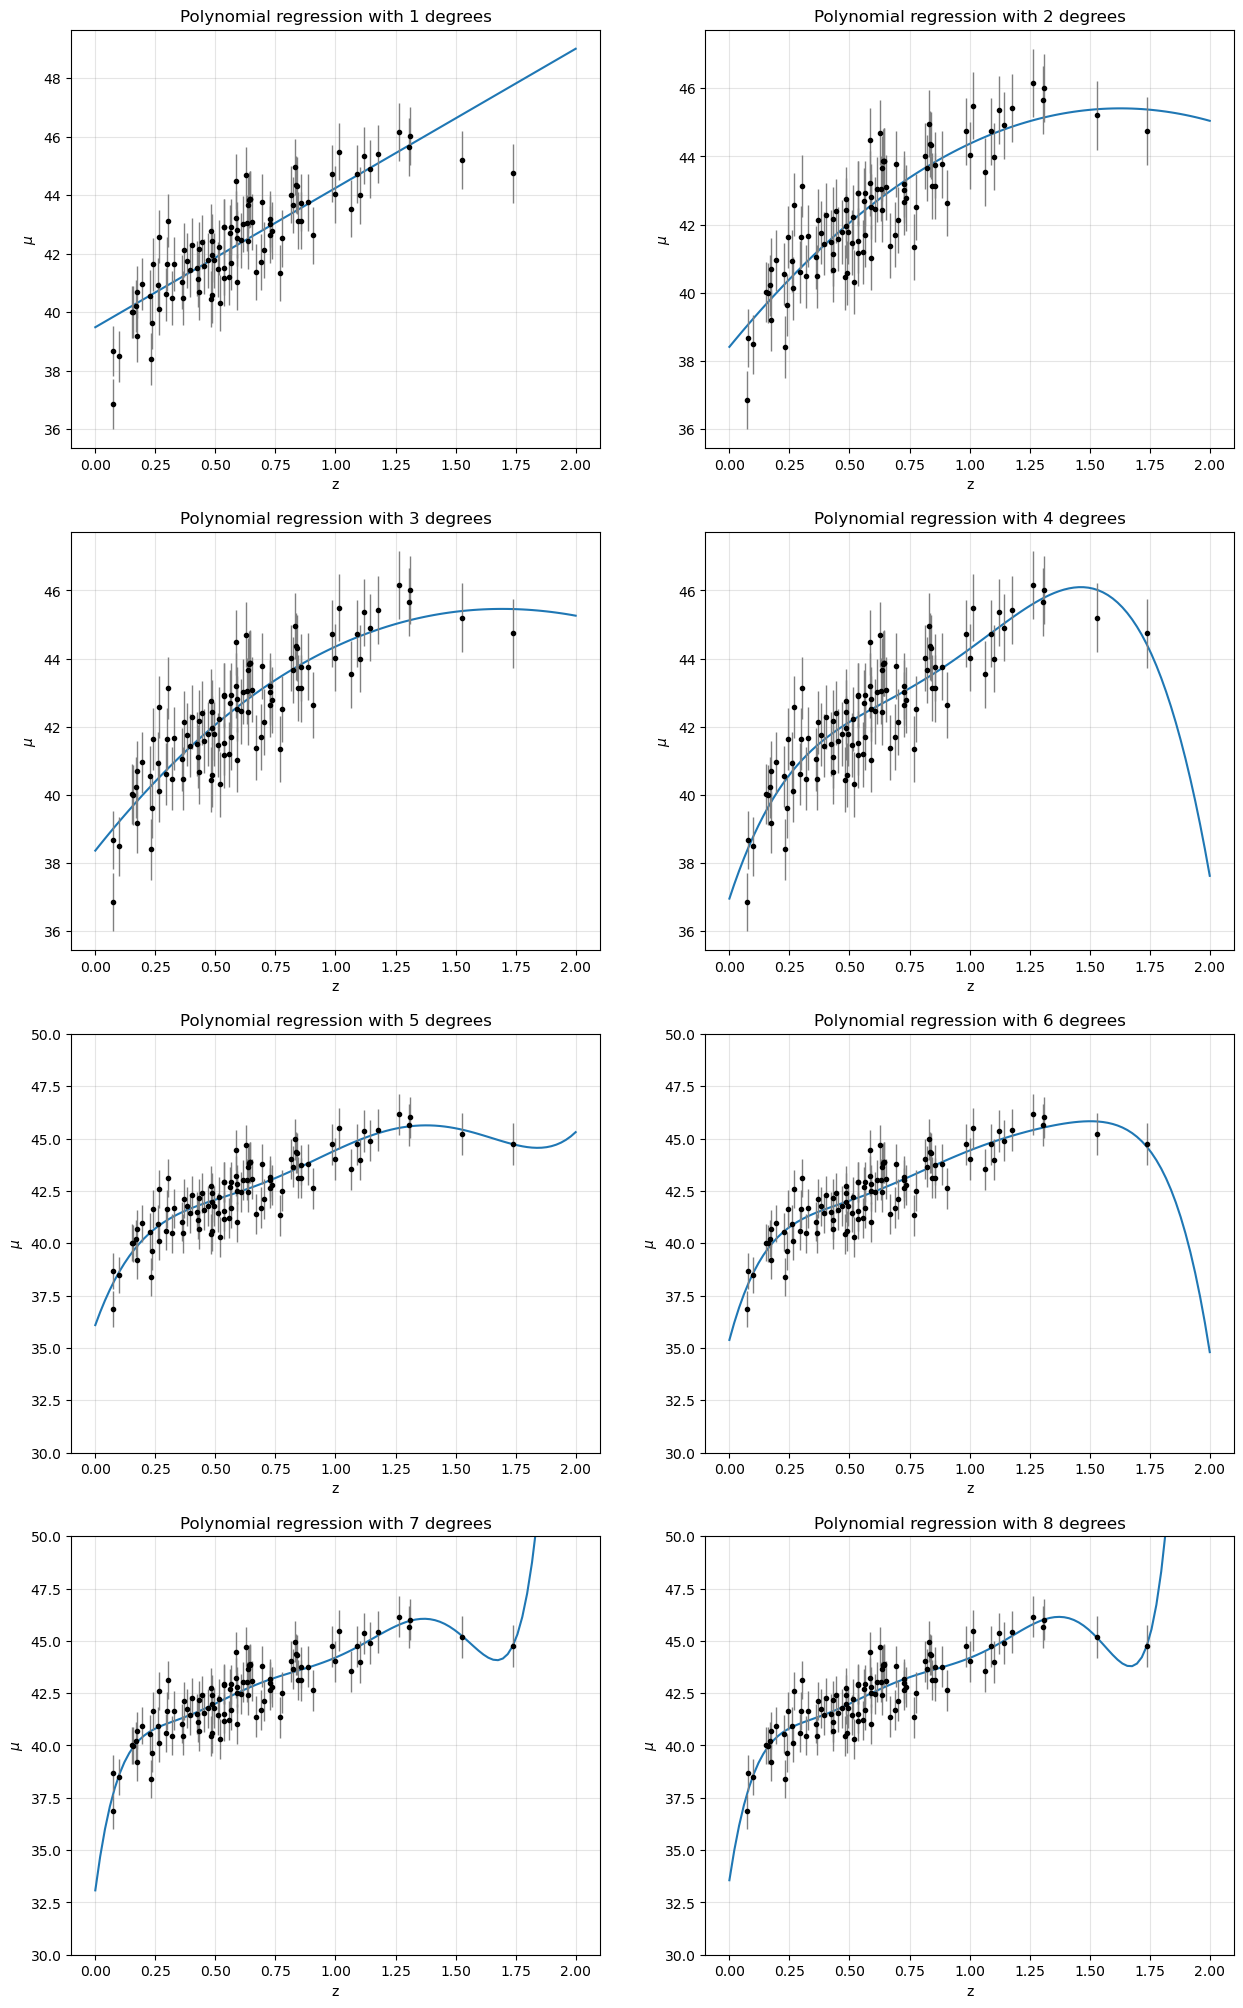

In [6]:
# fit 3rd degree polynomial
Xgrid = np.linspace(0, 2.0, 100)
Xpoint=Xgrid[:, np.newaxis]

degrees = [1, 2, 3, 4, 5, 6, 7, 8]
y_pred = []
n_constraints = []
for i in degrees:
    model = PolynomialRegression(i)
    model.fit(z_sample_r, mu_sample, dmu)
    y_pred.append(model.predict(Xpoint))
    print(f"With {i} degree the model coefficients are: {model.coef_}")

#Plot them
fig, ax = plt.subplots(4, 2, figsize=(15, 25))
ax[0,0].grid(c='grey', alpha = 0.2)
ax[0,0].set_title('Polynomial regression with 1 degrees')
ax[0,0].set_xlabel('z')
ax[0,0].set_ylabel('$\mu$')
ax[0,0].plot(Xgrid, y_pred[0])
ax[0,0].errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1,label='data')

ax[0,1].grid(c='grey', alpha = 0.2)
ax[0,1].set_title('Polynomial regression with 2 degrees')
ax[0,1].set_xlabel('z')
ax[0,1].set_ylabel('$\mu$')
ax[0,1].plot(Xgrid, y_pred[1])
ax[0,1].errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1,label='data')

ax[1,0].grid(c='grey', alpha = 0.2)
ax[1,0].set_title('Polynomial regression with 3 degrees')
ax[1,0].set_xlabel('z')
ax[1,0].set_ylabel('$\mu$')
ax[1,0].plot(Xgrid, y_pred[2])
ax[1,0].errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1,label='data')

ax[1,1].grid(c='grey', alpha = 0.2)
ax[1,1].set_title('Polynomial regression with 4 degrees')
ax[1,1].set_xlabel('z')
ax[1,1].set_ylabel('$\mu$')
ax[1,1].plot(Xgrid, y_pred[3])
ax[1,1].errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1,label='data')

ax[2,0].grid(c='grey', alpha = 0.2)
ax[2,0].set_title('Polynomial regression with 5 degrees')
ax[2,0].set_xlabel('z')
ax[2,0].set_ylabel('$\mu$')
ax[2,0].plot(Xgrid, y_pred[4])
ax[2,0].errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1,label='data')
ax[2,0].set_ylim(30, 50)

ax[2,1].grid(c='grey', alpha = 0.2)
ax[2,1].set_title('Polynomial regression with 6 degrees')
ax[2,1].set_xlabel('z')
ax[2,1].set_ylabel('$\mu$')
ax[2,1].plot(Xgrid, y_pred[5])
ax[2,1].errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1,label='data')
ax[2,1].set_ylim(30, 50)

ax[3,0].grid(c='grey', alpha = 0.2)
ax[3,0].set_title('Polynomial regression with 7 degrees')
ax[3,0].set_xlabel('z')
ax[3,0].set_ylabel('$\mu$')
ax[3,0].plot(Xgrid, y_pred[6])
ax[3,0].errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1,label='data')
ax[3,0].set_ylim(30, 50)

ax[3,1].grid(c='grey', alpha = 0.2)
ax[3,1].set_title('Polynomial regression with 8 degrees')
ax[3,1].set_xlabel('z')
ax[3,1].set_ylabel('$\mu$')
ax[3,1].plot(Xgrid, y_pred[7])
ax[3,1].errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1,label='data')
ax[3,1].set_ylim(30, 50)

By looking at these plots, I think that the best fit is the one with 3 degrees or the one with 4 degrees. 
For sure, we are overfitting with degree bigger than 6. \
Now we check with cross-validation which is the best.

## k-fold Cross validation

In [7]:
n = 10 #Number of splits
rms_train_tot = np.empty(len(degrees))
rms_test_tot = np.empty(len(degrees))

# For the standard deviation
rms_train_tot_std = np.empty(len(degrees))
rms_test_tot_std = np.empty(len(degrees))

for j, degree in enumerate(degrees):

    kf = KFold(n_splits=n, shuffle=True, random_state=123)     #Create the indexes for the split in train and test data
                                                               #With random_state fixed we have always the same split, so data are reproducible  
    rms_train = np.empty(n)
    rms_test = np.empty(n)
    
    for (train_index, test_index), i in zip(kf.split(z_sample_r), np.arange(n)): #Divide the redshifts data in the folds
        z_train, z_test = z_sample_r[train_index], z_sample_r[test_index]
        mu_train, mu_test = mu_sample[train_index], mu_sample[test_index]
        dmu_train, dmu_test = dmu[train_index], dmu[test_index]
    
        model = PolynomialRegression(degree)
        model.fit(z_train, mu_train, dmu_train)
        
        # Remember, I want to evaluate the rms both on the training data and the test data!
        rms_train[i] = np.sqrt(np.sum((mu_train - model.predict(z_train))**2)/len(z_train)) #predict valuta dove dovrebbe essere il dato secondo secondo il polyfit
        rms_test[i] = np.sqrt(np.sum((mu_test - model.predict(z_test))**2)/len(z_test))
    
    print('Degree: %i - Train: %.4f - Test: %.4f' % (degree, np.mean(rms_train), np.mean(rms_test)))
    rms_train_tot[j] = np.mean(rms_train) 
    rms_test_tot[j] = np.mean(rms_test)

    rms_train_tot_std[j] = np.std(rms_train)
    rms_test_tot_std[j] = np.std(rms_test)

d_best = degrees[np.argmin(rms_test_tot)]
print('\nThe best model is the one with %i degrees\n' % d_best)


Degree: 1 - Train: 0.9852 - Test: 0.9803
Degree: 2 - Train: 0.9026 - Test: 0.9118
Degree: 3 - Train: 0.9021 - Test: 0.9434
Degree: 4 - Train: 0.8693 - Test: 0.9395
Degree: 5 - Train: 0.8630 - Test: 0.8939
Degree: 6 - Train: 0.8590 - Test: 1.3612
Degree: 7 - Train: 0.8469 - Test: 1.1148
Degree: 8 - Train: 0.8460 - Test: 1.9707

The best model is the one with 5 degrees



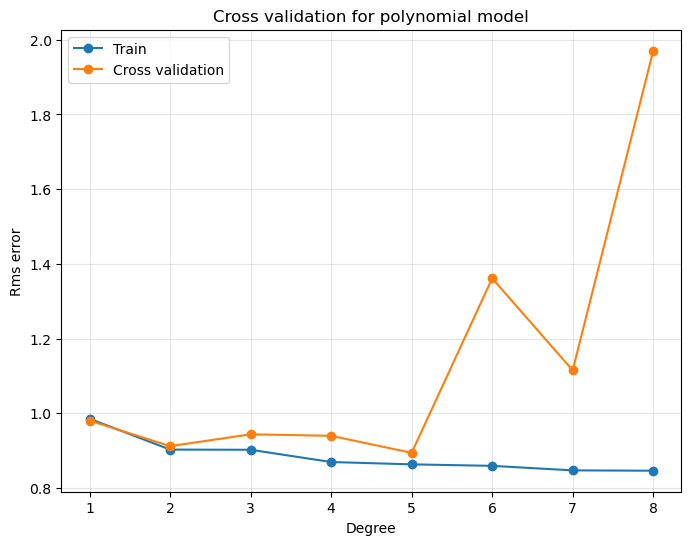

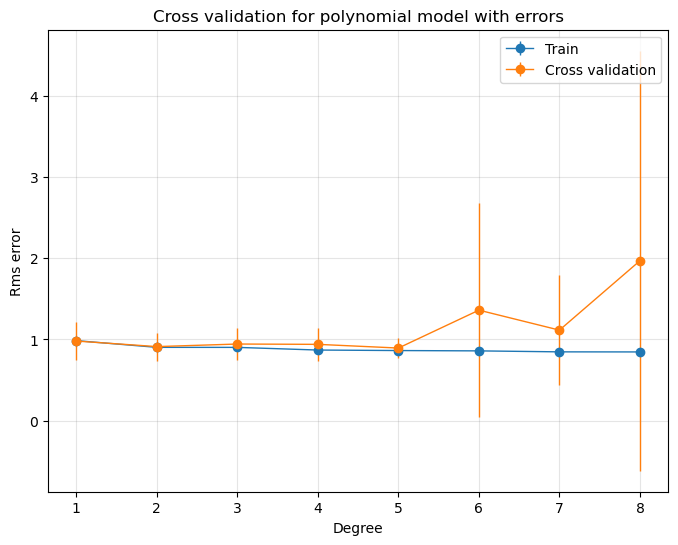

In [8]:
#Plot the errors
fig = plt.figure(figsize=(8,6))
ax = fig.gca()
ax.grid(c='grey', alpha = 0.2)
ax.set_title('Cross validation for polynomial model')
ax.set_xlabel('Degree')
ax.plot(degrees, rms_train_tot, label = 'Train', marker = 'o')
ax.plot(degrees, rms_test_tot, label = 'Cross validation', marker = 'o')
ax.set_ylabel('Rms error')
ax.legend()

fig2 = plt.figure(figsize=(8,6))
ax2 = fig2.gca()
ax2.grid(c='grey', alpha = 0.2)
ax2.set_title('Cross validation for polynomial model with errors')
ax2.set_xlabel('Degree')
ax2.errorbar(degrees, rms_train_tot, rms_train_tot_std, label = 'Train', marker = 'o', lw=1)
ax2.errorbar(degrees, rms_test_tot, rms_test_tot_std, label = 'Cross validation', marker = 'o', lw=1)
ax2.set_ylabel('Rms error')
ax2.legend()

## Basic Function Regression

[45.58117512 -2.53686988  0.43414619 -1.35673636  0.22055404 -0.90603408
 -0.23785351 -0.05963679 -0.7319465   0.26763366 -0.42129896]
[   44.57065931  -207.91667558   642.83516317 -1125.56954299
  1430.4538512  -1439.32447087  1174.80199345  -774.0560484
   395.24633938  -142.78350565    28.0906509 ]
[    44.46978966   1832.82456288  -8706.79582058  20063.58387327
 -29563.84028276  30765.55447465 -23486.0896724   13150.43558129
  -5189.16760212   1293.49018929   -150.12173879]
[ 7.93407482e+01  1.69972295e+05 -1.03201321e+06  2.97216439e+06
 -5.33485254e+06  6.58345028e+06 -5.79855848e+06  3.64958079e+06
 -1.58514282e+06  4.31946674e+05 -5.64379697e+04]
[ 5.07470121e+02  5.68461450e+06 -3.95352783e+07  1.27800160e+08
 -2.52222794e+08  3.35151972e+08 -3.11180274e+08  2.02045746e+08
 -8.85507651e+07  2.38013220e+07 -2.99499439e+06]
[ 3.36750417e+03  1.17159050e+08 -8.84359608e+08  3.06386174e+09
 -6.39829978e+09  8.88067912e+09 -8.50042568e+09  5.61434812e+09
 -2.46899152e+09  6.5654374

<ErrorbarContainer object of 3 artists>

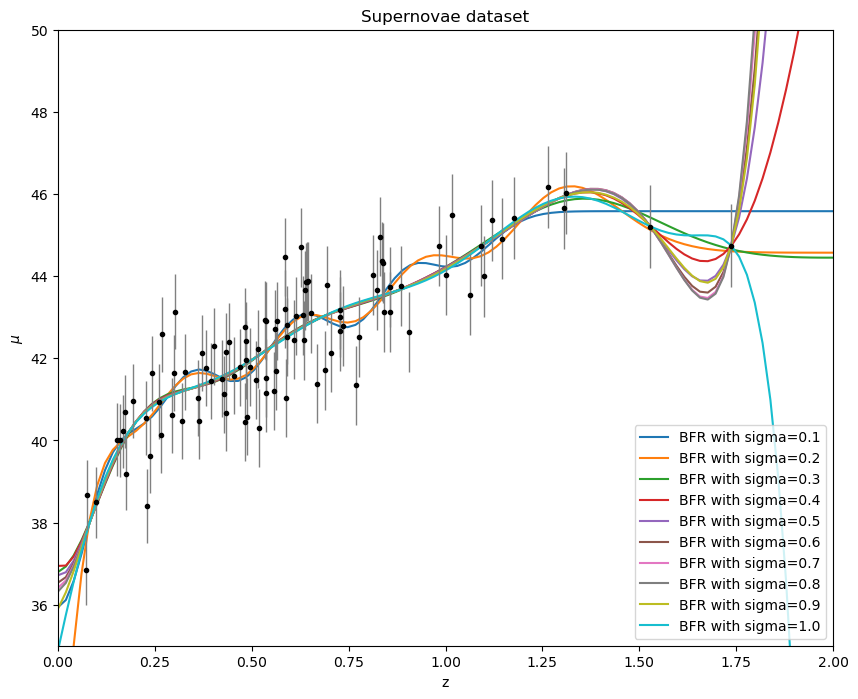

In [9]:
#Mean positions of the 10 Gaussians in the model 
X_gridtest = np.linspace(0, 1, 10)[:, None] 
fig = plt.figure(figsize=(10, 8))

#Widths of these Gaussians
sigma_test = np.round(np.linspace(0.1, 1, 10), 2)
for i in sigma_test:
    model = BasisFunctionRegression('gaussian', mu=X_gridtest, sigma=i)
    model.fit(z_sample_r, mu_sample, dmu)

    y_pred = model.predict(Xpoint)
    print(model.coef_)

    #Plot
    plt.xlabel("z")
    plt.ylabel("$\mu$")
    plt.xlim(0,2)
    plt.ylim(35,50)
    plt.title('Supernovae dataset')
    plt.plot(Xpoint, y_pred, label ='BFR with sigma='+str(i))
    plt.legend(loc='lower right')
    
plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1,label='data')

## Kernel regression

<ErrorbarContainer object of 3 artists>

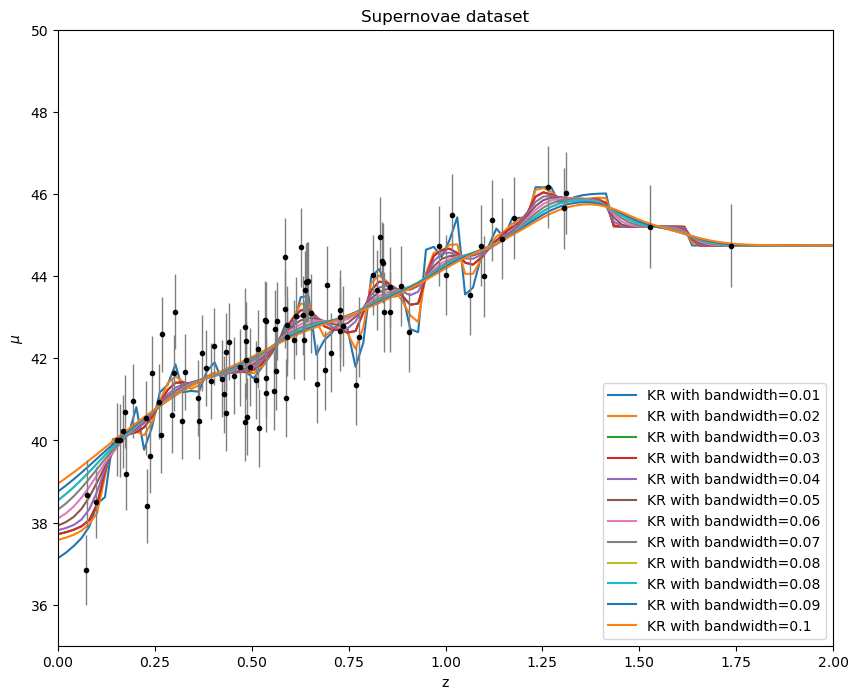

In [10]:
bandwidth = np.round(np.linspace(0.01, 0.1, 12), 2)

fig = plt.figure(figsize=(10, 8))
for bw in bandwidth:
    model = NadarayaWatson(kernel='gaussian', h=bw) 
    model.fit(z_sample_r, mu_sample, dmu)
    y_pred = model.predict(Xpoint)

    #Plot   
    plt.xlabel("z")
    plt.ylabel("$\mu$")
    plt.xlim(0,2)
    plt.ylim(35,50)
    plt.title('Supernovae dataset')
    plt.plot(Xpoint, y_pred, label ='KR with bandwidth='+ str(bw))
    plt.legend(loc='lower right')
    
plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1,label='data')

## Learning Curves

In [11]:
#We fix the degree = 5 which is found to be the best, npw we select different size samples
size = np.linspace(5, 100, 20, dtype='int')

rms_train_tot = np.empty(len(size))
rms_test_tot = np.empty(len(size))

# For the standard deviation
rms_train_tot_std = np.empty(len(size))
rms_test_tot_std = np.empty(len(size))

for j, ds in enumerate(size):
    data_indexes = np.random.choice(np.arange(0, 100), size=ds, replace=False)
    z_sample_s = z_sample_r[data_indexes]
    mu_sample_s = mu_sample[data_indexes]
    dmu_s = dmu[data_indexes]

    n = ds #Number of splits
    
    kf = KFold(n_splits=n, shuffle=True, random_state=123) 
    rms_train = np.empty(n)
    rms_test = np.empty(n)
    
    for (train_index, test_index), i in zip(kf.split(z_sample_s), np.arange(n)): #Divide the redshifts data in the folds
        z_train, z_test = z_sample_s[train_index], z_sample_s[test_index]
        mu_train, mu_test = mu_sample_s[train_index], mu_sample_s[test_index]
        dmu_train, dmu_test = dmu_s[train_index], dmu_s[test_index]

        model = PolynomialRegression(d_best)
        model.fit(z_train, mu_train, dmu_train)
    
        # Remember, I want to evaluate the rms both on the training data and the test data!
        rms_train[i] = np.sqrt(np.sum((mu_train - model.predict(z_train))**2)/len(z_train)) #predict valuta dove dovrebbe essere il dato secondo secondo il polyfit
        rms_test[i] = np.sqrt(np.sum((mu_test - model.predict(z_test))**2)/len(z_test))
       
    rms_train_tot[j] = np.mean(rms_train) 
    rms_test_tot[j] = np.mean(rms_test)

    rms_train_tot_std[j] = np.std(rms_train)
    rms_test_tot_std[j] = np.std(rms_test)


(-1.0, 2.5)

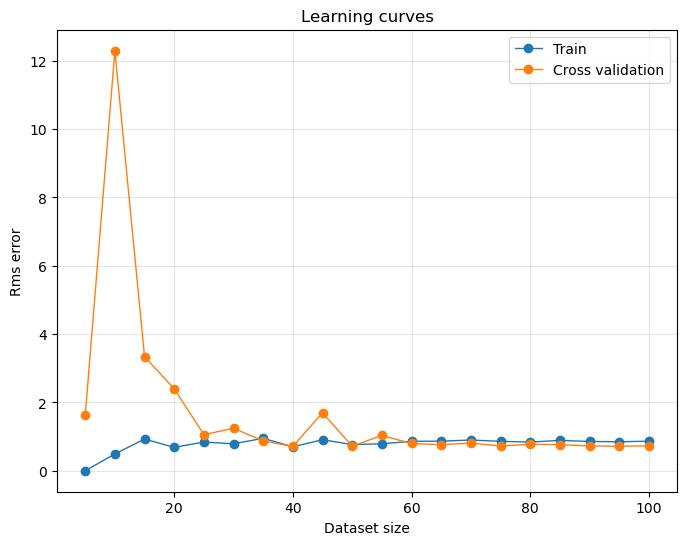

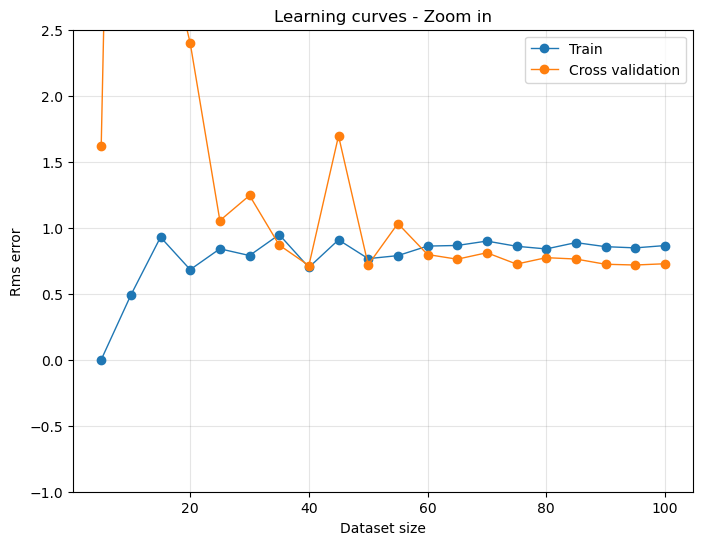

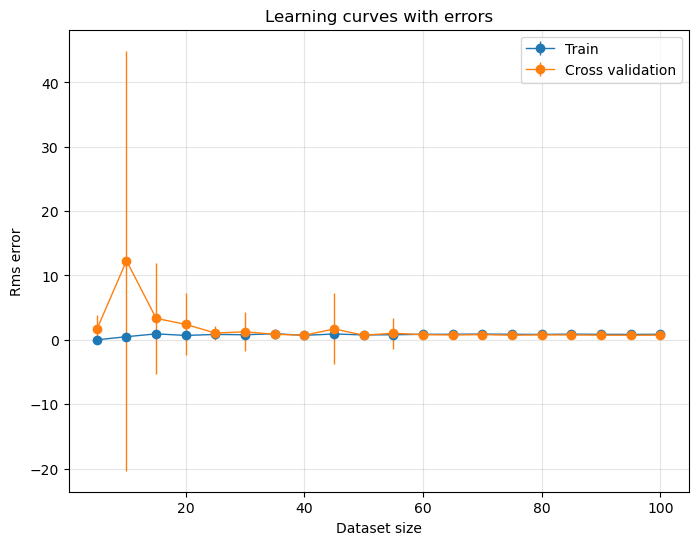

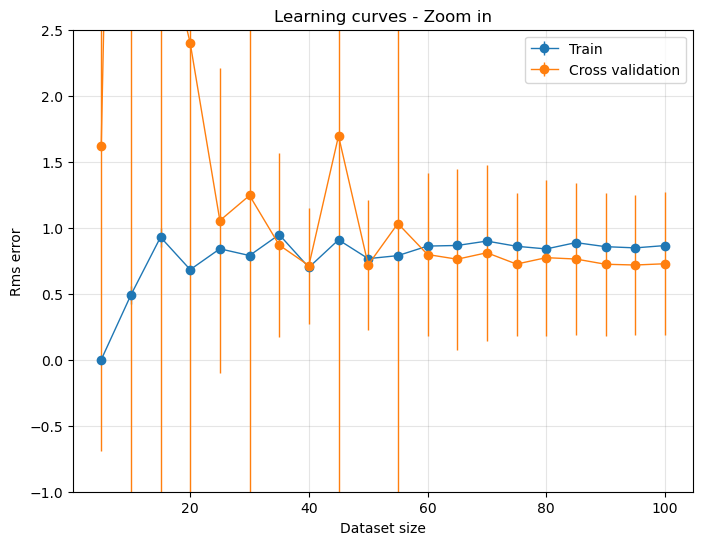

In [12]:
#Plot the errors
fig = plt.figure(figsize=(8,6))
ax = fig.gca()
ax.grid(c='grey', alpha = 0.2)
ax.set_title('Learning curves')
ax.set_xlabel('Dataset size')
ax.plot(size, rms_train_tot, label = 'Train', marker = 'o', lw = 1)
ax.plot(size, rms_test_tot, label = 'Cross validation', marker = 'o', lw = 1)
ax.set_ylabel('Rms error')
ax.legend()

fig2 = plt.figure(figsize=(8,6))
ax2 = fig2.gca()
ax2.grid(c='grey', alpha = 0.2)
ax2.set_title('Learning curves - Zoom in')
ax2.set_xlabel('Dataset size')
ax2.plot(size, rms_train_tot, label = 'Train', marker = 'o', lw = 1)
ax2.plot(size, rms_test_tot, label = 'Cross validation', marker = 'o', lw = 1)
ax2.set_ylabel('Rms error')
ax2.legend()
ax2.set_ylim(-1.0, 2.5)

fig3 = plt.figure(figsize=(8,6))
ax3 = fig3.gca()
ax3.grid(c='grey', alpha = 0.2)
ax3.set_title('Learning curves with errors')
ax3.set_xlabel('Dataset size')
ax3.errorbar(size, rms_train_tot, rms_train_tot_std, label = 'Train', marker = 'o', lw = 1)
ax3.errorbar(size, rms_test_tot, rms_test_tot_std, label = 'Cross validation', marker = 'o', lw = 1)
ax3.set_ylabel('Rms error')
ax3.legend()

fig4 = plt.figure(figsize=(8,6))
ax4 = fig4.gca()
ax4.grid(c='grey', alpha = 0.2)
ax4.set_title('Learning curves - Zoom in')
ax4.set_xlabel('Dataset size')
ax4.errorbar(size, rms_train_tot, rms_train_tot_std, label = 'Train', marker = 'o', lw = 1)
ax4.errorbar(size, rms_test_tot, rms_test_tot_std, label = 'Cross validation', marker = 'o', lw = 1)
ax4.set_ylabel('Rms error')
ax4.legend()
ax4.set_ylim(-1.0, 2.5)

The two errors converge around 40 points, so this means that we don't require a bigger sample to improve our fit.
